In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [2]:
raw_data=loadarff('./data/philipine.arff')
df=pd.DataFrame(raw_data[0])
df.head()

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308
0,b'0',1.43676,0.000353,1972.84,0.007600,-0.015531,0.780376,103461.0,0.024912,-0.2213,...,36.5197,0.865036,0.359862,0.003133,2.76052,750.11,-0.008810,0.009179,42.6805,252.0
1,b'1',2.70690,0.000678,3955.21,-0.009876,-0.003330,0.733401,150978.0,0.028482,0.2259,...,64.3038,0.703948,0.610000,-0.006252,4.18539,1200.69,0.049434,-0.005465,41.6983,251.0
2,b'1',0.46472,0.000715,1453.81,0.002587,-0.005504,0.771300,88342.0,0.031772,0.0624,...,24.0798,0.806948,0.112245,-0.010088,1.31197,3876.00,0.006898,0.022098,55.1792,113.0
3,b'0',3.06980,0.000357,2036.55,0.005065,0.009438,0.873578,123739.0,0.009533,-0.2277,...,44.5886,0.874592,0.348765,0.007156,2.19352,1013.80,0.010855,-0.002765,39.9233,242.0
4,b'1',1.65000,0.000545,2325.00,0.006807,-0.003393,0.803415,103812.0,0.014284,0.0149,...,30.0132,0.742672,0.284024,-0.003029,2.93776,1336.37,0.015256,-0.010514,39.5254,213.0


# Experimental Data Analysis

In [11]:
# Having a rough idea about the features
df.info()
# We know that there are 308 numerical features, 0 categorical feature.
# The number of features is pretty large. Dimension reduction should be applied later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832 entries, 0 to 5831
Columns: 309 entries, class to V308
dtypes: float64(308), object(1)
memory usage: 13.7+ MB


In [12]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308
count,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,...,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000
mean,1.903598,0.000533,2446.956681,0.000106,-0.000063,0.832796,121053.520405,0.024931,0.002943,24.647291,...,49.403312,0.838403,0.881956,0.000118,2.668021,1719.546519,0.003526,0.000106,43.174430,215.478738
std,0.984489,0.000141,835.852926,0.015186,0.010544,0.121695,62224.278643,0.015716,0.737231,24.494244,...,17.384206,0.098982,1.203687,0.010764,0.838648,1138.477709,0.013745,0.008013,10.321669,47.072157
min,0.045987,0.000131,500.280000,-0.649438,-0.091119,0.355974,673.000000,0.000000,-4.491600,0.000000,...,11.063500,0.586782,0.048469,-0.266248,0.000000,2.560100,-0.048709,-0.136006,13.520000,57.000000
25%,1.238225,0.000436,1869.365000,-0.004881,-0.005311,0.761118,83553.500000,0.013562,-0.393200,3.000000,...,37.041775,0.759063,0.285714,-0.005471,2.072910,875.556000,-0.004368,-0.004591,38.176050,185.750000
50%,1.708615,0.000510,2376.200000,0.000062,-0.000044,0.851770,111566.000000,0.021129,0.024150,15.000000,...,47.422450,0.842142,0.461880,0.000028,2.630795,1423.420000,0.003299,0.000060,43.766200,238.000000
75%,2.331205,0.000608,2936.902500,0.004918,0.004977,0.932652,145342.000000,0.032785,0.416225,43.000000,...,59.118775,0.924136,0.831241,0.005371,3.171695,2293.850000,0.011976,0.004893,49.014900,254.000000
max,7.947130,0.001925,7167.880000,0.702363,0.468338,1.000000,933558.000000,0.206681,5.858300,131.000000,...,99.769700,1.000000,13.958600,0.321143,17.816500,12262.900000,0.072483,0.069518,76.280400,255.000000


In [13]:
# Checking if any missing value presents
df.isna().sum().values.sum()
# no missing value is found in this dataset

0

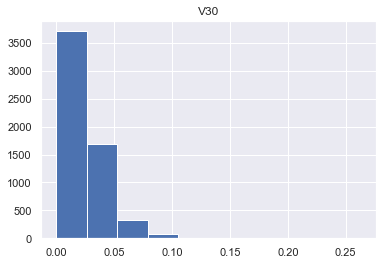

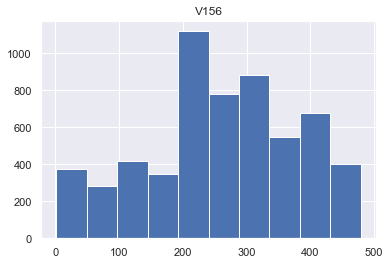

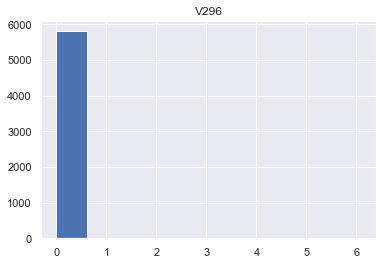

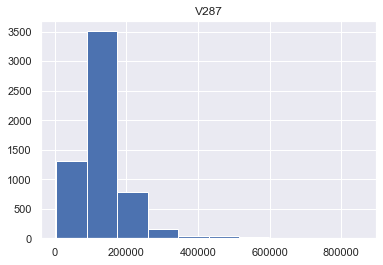

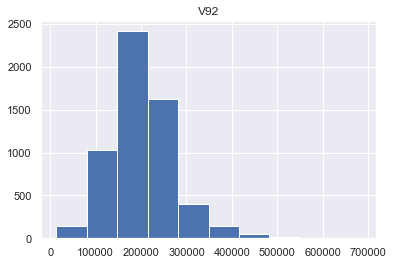

In [14]:
# randomly plot histograms of some features to see their distribution
index_list=np.random.randint(1,309,5)
for i in index_list:
    temp_feature_name='V'+str(i)
    plt.hist(df[temp_feature_name])
    plt.title(temp_feature_name)
    plt.show()

# Some of their distributions are curved / uniform, but many are still very dense.

In [3]:
x=df.drop(['class'],axis=1)
y=np.where(df['class']==b'1',1,0)

<AxesSubplot:>

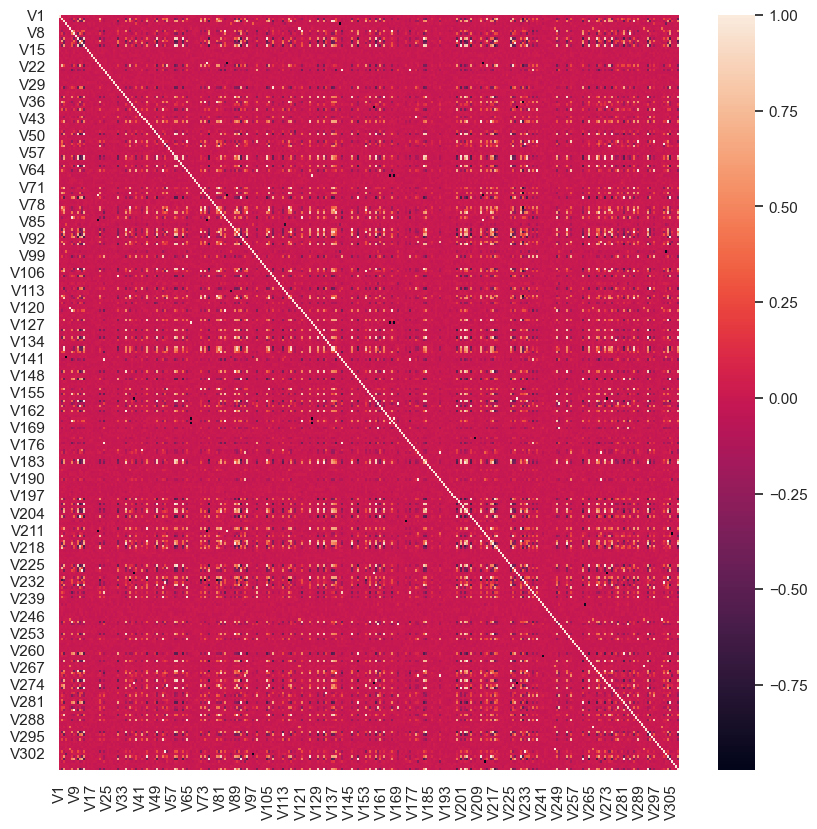

In [12]:
fig,ax=plt.subplots(figsize=(10,10),dpi=100)
sns.heatmap(x.corr())
#Correlation presents somehow

(array([292.,   0.,   0.,   0.,   5.,   9.,   0.,   1.,   0.,   1.]),
 array([1.58968215e-08, 9.13812375e+08, 1.82762475e+09, 2.74143712e+09,
        3.65524950e+09, 4.56906187e+09, 5.48287425e+09, 6.39668662e+09,
        7.31049900e+09, 8.22431137e+09, 9.13812375e+09]),
 <BarContainer object of 10 artists>)

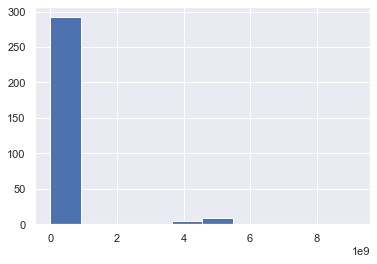

In [8]:
# Primary variance analysis
var_list=[]
for i in range(1,df.shape[1]):
    temp_feature_name='V'+str(i)
    var_list.append(np.var(df[temp_feature_name]))

plt.hist(var_list)

# Variance are very dense while some extreme outliers present.

# Data Transformation & Dimension Reduction

Text(0.5, 1.0, 'Cumulative PCA explained variance ratio')

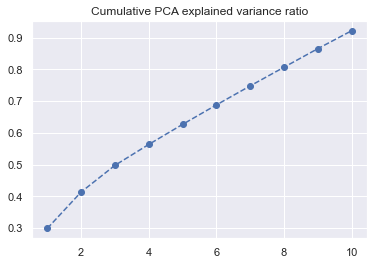

In [4]:
# PCA is used for a trial. However, transformed data using PCA doesn't give desirable model performance.
from sklearn.decomposition import PCA

pca=PCA(n_components=0.9)
x_pca=pca.fit_transform(x)
cum_explained_variance_ratio=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 11), cum_explained_variance_ratio,'--o')
plt.title('Cumulative PCA explained variance ratio')
# 10 features explains 90% of the total variance.
# Feature number is significantly reduced from 308 to 10.

<AxesSubplot:>

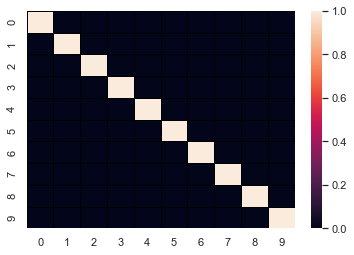

In [9]:
xpca_temp=pd.DataFrame(x_pca)
sns.heatmap(xpca_temp.corr(),linewidths=1,linecolor='black')

In [25]:
# A more advanced transforming method, umap, is introduced here.
# Data transformed using umap tend to have better model performance.
# This is due to the mathematical nature of umap transforming method.
# For more information about umap, you can refer to https://umap-learn.readthedocs.io/en/latest/index.html

from sklearn.preprocessing import StandardScaler
# Standardization is preferred before transformation with umap, according to the official document.
sd_transfer=StandardScaler()
x_sd=sd_transfer.fit_transform(x)

import umap
reducer=umap.UMAP(n_neighbors=20, n_components=10, metric = "euclidean", random_state=42, n_jobs=-1)

# 10 features is a good guess based on PCA result
# Based on my trial, n_components=3 also gives a desirable result with a slightly lower accuracy
x_umap=reducer.fit_transform(x_sd)
x_umap.shape

(5832, 10)

<AxesSubplot:>

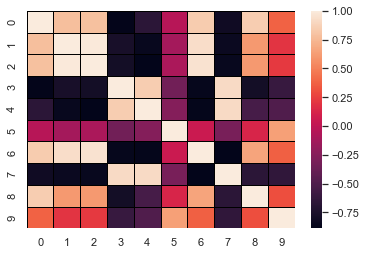

In [28]:
xumap_temp = pd.DataFrame(x_umap)
sns.heatmap(xumap_temp.corr(method='spearman'), linewidths=1, linecolor='black')

<AxesSubplot:>

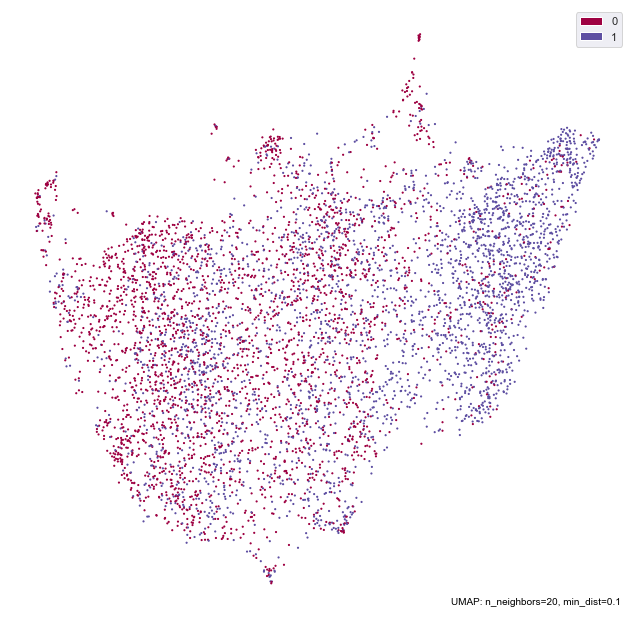

In [6]:
# A trial to reduce the dimension to 2.
import umap.plot
reducer2=umap.UMAP(n_neighbors=20, n_components=2, random_state=42, n_jobs=-1)
x_umap2=reducer2.fit_transform(x_sd)
umap.plot.points(reducer2,labels=y)
# However, the plot suggests that n_components=2 is not sufficient to separate the data clearly.

# Output post-process data

In [9]:
name_list=[]
name_list.append('class')
for i in range(1,11):
    temp_fname='NTV'+str(i) #NT stands for newly transformed
    name_list.append(temp_fname)

full_name_list=[]
full_name_list.append('class')
for i in range(1,309):
    temp_fname='V'+str(i) #NT stands for newly transformed
    full_name_list.append(temp_fname)

y_temp=y.reshape(-1,1)
df_umap=pd.DataFrame(data=np.concatenate([y_temp,x_umap],axis=1), columns=name_list)
df_umap.to_csv('./data/df_umap.csv',index=False)

df=pd.DataFrame(np.concatenate([y_temp,x],axis=1),columns=full_name_list)
df.to_csv('./data/df.csv',index=False)

#For experimental purpose only
df=pd.DataFrame(np.concatenate([y_temp,x_sd],axis=1),columns=full_name_list)
df.to_csv('./data/df_sd.csv',index=False)